# House Pricing

## Problem Statement

We would like to predict the house of a house based on its characteristics 

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("house_prices.csv")
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df=df[df["TotalSF"]<6000]

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2566
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2524
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2706
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2473
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,3343


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 0 to 1459
Data columns (total 82 columns):
Id               1455 non-null int64
MSSubClass       1455 non-null int64
MSZoning         1455 non-null object
LotFrontage      1197 non-null float64
LotArea          1455 non-null int64
Street           1455 non-null object
Alley            91 non-null object
LotShape         1455 non-null object
LandContour      1455 non-null object
Utilities        1455 non-null object
LotConfig        1455 non-null object
LandSlope        1455 non-null object
Neighborhood     1455 non-null object
Condition1       1455 non-null object
Condition2       1455 non-null object
BldgType         1455 non-null object
HouseStyle       1455 non-null object
OverallQual      1455 non-null int64
OverallCond      1455 non-null int64
YearBuilt        1455 non-null int64
YearRemodAdd     1455 non-null int64
RoofStyle        1455 non-null object
RoofMatl         1455 non-null object
Exterior1st      1455 non-n

In [5]:
# Data Preparation
X = df[['TotalSF']] # pandas DataFrame
y = df["SalePrice"] # pandas Series

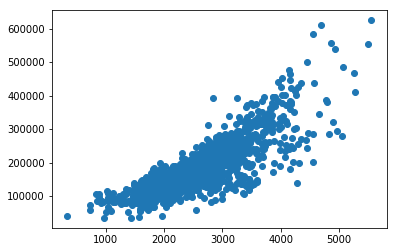

In [6]:
plt.scatter(X,y)

## Linear Regression with Sklearn

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
reg = LinearRegression()

In [9]:
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
reg.coef_

array([83.79128706])

In [11]:
reg.predict([ [3500] ])

array([259695.552062])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [14]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
reg.coef_ # new reg with split

array([82.67175649])

In [17]:
pred=reg.predict(X_test)

In [19]:
#y_test

In [20]:
y_test-pred

498      15471.505863
1265     37956.238396
411       1619.062847
1049     39237.079020
1036     78865.321525
615       4205.017139
218     115209.138693
1186    -95090.479570
1195     26666.696380
888     -67344.755725
1102    -11026.433360
609     -20416.662302
1061    -35595.288050
568      47888.680007
813     -49303.533164
1035     45364.178322
168       3082.115939
1046    186018.076010
929     -11327.808215
67       14828.222525
1040    -56585.136258
451      57750.207155
670      21686.543685
877      76493.718130
192     -13384.754521
123     -13125.059509
413     -22097.883659
277      29365.017340
1300     11430.741586
663     -22993.990746
            ...      
1267     77381.351462
864      54950.512745
1216    -14019.868290
332     -84496.130078
573      51255.246282
203      40010.513548
1456    -57636.587159
1415    -37173.227875
427      -9736.753718
580        407.383105
747     -23565.602629
422     -19137.578270
839       -976.204218
1120    -17705.822581
554      6

In [24]:
np.mean(np.abs(y_test-pred))

33687.64542462718

In [25]:
from sklearn.metrics import mean_absolute_error

In [26]:
mean_absolute_error(y_test,pred) #MAE

33687.645424627175

In [27]:
np.mean(np.abs(y_test-pred)/y_test) #MAPE

0.1987348040558154

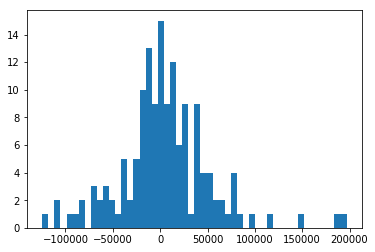

In [28]:
plt.hist(y_test-pred,bins=50);

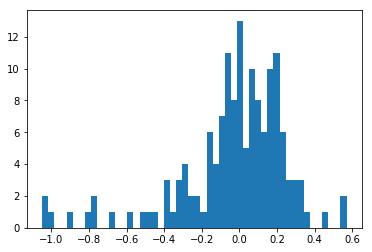

In [29]:
plt.hist((y_test-pred)/y_test,bins=50);

In [30]:
xgrid = [ [i] for i in np.linspace(1000,5000,1000)] # list of lists

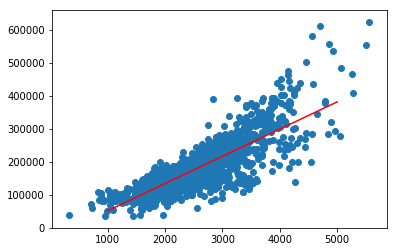

In [31]:
plt.plot(xgrid,reg.predict(xgrid),color="red")
plt.scatter(X,y);

## K Neighbors Regressor

In [32]:
from sklearn.neighbors import KNeighborsRegressor

In [33]:
regk = KNeighborsRegressor(n_neighbors=4)

In [34]:
regk.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=4, p=2,
          weights='uniform')

In [35]:
mean_absolute_error(y_test,regk.predict(X_test))

35203.75171232877

One advantage of KNN is that you can use it for any kind of function, it does not need to be linear

In [36]:
xt = np.linspace(0,10,100)
yt= sin(xt)

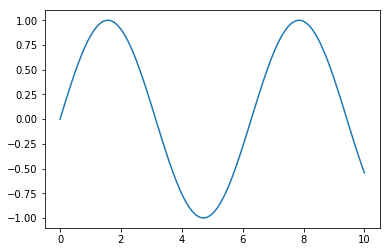

In [37]:
plt.plot(xt,yt)

In [42]:
np.corrcoef?

In [44]:
np.corrcoef(xt,yt)[0][1] #negative correlation (Pearson)

-0.07589466694797199

### Error evolution with number of neighbors

In [45]:
maes=[]
for i in range(4,100):
    regk = KNeighborsRegressor(n_neighbors=i)
    regk.fit(X_train,y_train)
    maes.append(mean_absolute_error(y_test,regk.predict(X_test)))

In [47]:
np.mean(y_train)

179885.538579068

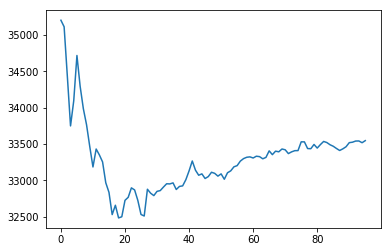

In [48]:
plt.plot(maes)

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
mean_squared_error(y_test,regk.predict(X_test))

2660514406.667472

In [51]:
np.sqrt(mean_squared_error(y_test,regk.predict(X_test)))

51580.17455057197

## Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score

In [61]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'log_loss',
 'mean_absolute_error',
 'mean_squared_error',
 'median_absolute_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [62]:
cross_val_score(regk,X,y,cv=5,scoring="neg_mean_absolute_error").mean()

-30356.937686139747

In [64]:
from sklearn.neighbors import KNeighborsRegressor

In [65]:
regk = KNeighborsRegressor(n_neighbors=19)

In [66]:
cross_val_score(regk,X,y,cv=5,scoring="neg_mean_absolute_error").mean()

-30450.566467715682

In [68]:
regl = LinearRegression()
cross_val_score(regl,X,y,cv=5).mean() # MAPE for default

0.6743222983700765

In [69]:
reg_final = LinearRegression()
reg_final.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Grid Search CV

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
GridSearchCV?

In [72]:
reg = GridSearchCV(KNeighborsRegressor(),
                  param_grid={"n_neighbors":np.arange(4,100)},
                  cv=5,
                  scoring="neg_mean_absolute_error")

In [73]:
reg.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 4,  5, ..., 98, 99])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [74]:
reg.best_params_

{'n_neighbors': 82}

In [75]:
reg.best_score_

-30197.346752158242

In [76]:
reg_final = reg.best_estimator_

In [77]:
reg_final

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=82, p=2,
          weights='uniform')

In [78]:
reg.predict(2453)

array([164278.03658537])

## Decision Tree Regressor

In [79]:
from sklearn.tree import DecisionTreeRegressor

In [80]:
regd = DecisionTreeRegressor(max_depth=5)

In [81]:
cross_val_score(regd,X,y,cv=5,scoring="neg_mean_absolute_error").mean()

-31645.312498536532

In [82]:
reg = GridSearchCV(DecisionTreeRegressor(),
                  param_grid={"max_depth":np.arange(2,8),
                              "min_samples_leaf":[10,30,50,100]},
                  cv=5,
                  scoring="neg_mean_absolute_error")

In [83]:
reg.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]), 'min_samples_leaf': [10, 30, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [84]:
reg.best_score_

-30439.471232279666

In [85]:
reg.best_params_

{'max_depth': 4, 'min_samples_leaf': 30}

### Randomized Search CV

In [86]:
from sklearn.model_selection import RandomizedSearchCV

In [87]:
RandomizedSearchCV?

In [88]:
reg = RandomizedSearchCV(DecisionTreeRegressor(),
                  param_distributions={"max_depth":np.arange(2,8),
                              "min_samples_leaf":[10,30,50,100]},
                  cv=5,
                  scoring="neg_mean_absolute_error",
                  n_iter=5      )

In [89]:
reg.fit(X,y)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
          fit_params=None, iid=True, n_iter=5, n_jobs=1,
          param_distributions={'max_depth': array([2, 3, 4, 5, 6, 7]), 'min_samples_leaf': [10, 30, 50, 100]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)

In [90]:
reg.best_score_

-30526.768873732395

In [91]:
reg.best_params_

{'min_samples_leaf': 50, 'max_depth': 6}

### Creating your own scorer

In [92]:
# Correlation
def corr_test(y_test,pred):
    return np.corrcoef(y_test,pred)[0][1]

In [93]:
from sklearn.metrics import make_scorer
cross_val_score(regd,X,y,cv=5,scoring=make_scorer(corr_test)).mean()

0.8021220619879849

In [94]:
reg = GridSearchCV(DecisionTreeRegressor(),
                  param_grid={"max_depth":np.arange(2,8),
                              "min_samples_leaf":[10,30,50,100]},
                  cv=5,
                  scoring=make_scorer(corr_test))

In [95]:
reg.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]), 'min_samples_leaf': [10, 30, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(corr_test), verbose=0)

In [96]:
reg.best_params_

{'max_depth': 3, 'min_samples_leaf': 10}

In [97]:
reg.best_score_

0.8206114568742358

### Drawing the Decision Tree

In [98]:
from IPython.display import Image

In [99]:
from sklearn.tree import export_graphviz

In [100]:
import pydotplus
#from string import String

In [101]:
import io
dot_data = io.StringIO()

In [102]:
export_graphviz(reg.best_estimator_, out_file=dot_data,filled=True, rounded=True,
 special_characters=True)

In [103]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [104]:
from IPython.display import Image
Image(graph.create_png())

InvocationException: GraphViz's executables not found

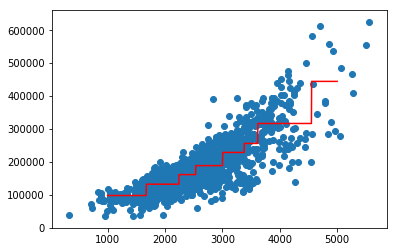

In [105]:
plt.plot(xgrid,reg.best_estimator_.predict(xgrid),color="red")
plt.scatter(X,y);